# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction

## Stage 3: Question answering / Information Retrieval

**Team: Rebecca Gergess, Tejesh Reddy Koki, Sasa Ljubisavljevic***

19.  January 2024

### Pre-preprocessing

In this phase, we are developing a specialized preprocessing function designed for our project's unique requirements. Our central objective is to preserve punctuation, recognizing its pivotal role in delineating sentence boundaries and capturing nuanced context. This becomes particularly crucial for key sentence extraction and the generation of question-answer pairs within our system. Additionally, we are adopting a cautious stance on stemming and stop word removal, prioritizing the retention of the original meaning of sentences. Our meticulous approach aims to safeguard the overall context, a critical factor contributing to the efficacy of our question-answering system.

The provided code snippet below demonstrates a text preprocessing function applied to a dataset using the pandas library in Python. The preprocess_text function employs regular expressions to remove emojis, unwanted text snippets, phrases, bullet points, special characters, quotes, and square brackets. The function also ensures consistent spacing and eliminates content within parentheses. A random sample of 500 rows is selected from a dataset loaded using pandas, and the preprocessing function is applied to the 'content' column, creating a new 'preprocessed_content' column. The resulting preprocessed text is printed for the first 10 rows as an example

In [71]:
import pandas as pd
import re
import random

def preprocess_text(text):
    
    # Remove emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Remove specific unwanted text snippets
    unwanted_snippets = [
    "window.dojoRequire ( [ `` mojo/signup-forms/Loader '' ], function ( L) { L.start ( { `` baseUrl '': '' mc.us4.list-manage.com '', '' uuid '': '' 2a6df7ce0f3230ba1f5efe12c '', '' lid '': '' 1e23cc3ebd '', '' uniqueMethods '': true }) })",
    "By clicking `` Allow All '' you agree to the storing of cookies on your device to enhance site navigation, analyse site usage and support us in providing free open access scientific content. More info.",
    "Sign in to get the best natural gas news and data. Follow the topics you want and receive the daily emails.",
    "Your email address *",
    "Your password *",
    "Remember me Continue",
    "Reset password",
    "Featured Content",
    "News & Data Services",
    "Client Support",
    "Daily GPI",
    "E & P | NGI All News Access"]
    
    # Remove specific unwanted phrases with variations
    cookie_phrase_pattern = r"By clicking .*? you agree to the storing of cookies .*? More info\."
    text = re.sub(cookie_phrase_pattern, '', text, flags=re.DOTALL)

    
    # Remove bullet points and special characters
    text = re.sub(r"[\•\-\‚Ä¢]", "", text)
    
    # Remove content within square brackets (if consistently at the start and end)
    text = re.sub(r"^\[\"|\"\]$", "", text)

    # Remove all content within parentheses, including nested parentheses
    text = re.sub(r'\([^()]*\)', '', text)  # Remove simple parentheses first
    text = re.sub(r'\(.*?\)', '', text)  # Remove remaining parentheses

    # Remove various types of quotes and double quotes
    text = re.sub(r'[“”\"‚Äù‚Äú‚Äô‘’\'`“”‘’]', '', text)
    text = re.sub(r"''", '', text)  # Remove double single quotes
    text = re.sub(r'``', '', text)  # Remove double backticks

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove square brackets
    text = re.sub(r'[\[\]]', '', text)


    return text
# Set a seed for reproducibility
random_seed = 123
random.seed(random_seed)

# Load the dataset
data_sample = pd.read_csv('cleaned_data.csv')

# Select 500 random rows from the DataFrame
data_sample = data_sample.sample(n=500, random_state=random_seed)

# Apply the preprocessing function
data_sample['preprocessed_content'] = data_sample['content'].apply(preprocess_text)

# Print only the first 10 rows as an example
for index, row in data_sample.head(10).iterrows():
    print(f"\nRow {index}:")
    print("Preprocessed Content:")
    print(row['preprocessed_content'])



Row 4996:
Preprocessed Content:
Sign in to get the best natural gas news and data. Follow the topics you want and receive the daily emails., Your email address *, Your password *, Remember me Continue, Reset password, Featured Content, News & Data Services, Client Support, LNG Insight, LNG | Natural Gas Prices | NGI All News Access, Natural gas prices in Europe and Asia are moving higher as the market has continued to tighten in a trend that s setting the stage for a bullish summer for liquefied natural gas exports., Both the prompt Title Transfer Facility and National Balancing Point contracts jumped above $ 7/MMBtu last week, while JapanKorea Marker futures shot above $ 8. The strength has spilled into this week as buying remains strong in both regions. All three benchmarks closed higher on Monday and Tuesday., The writing is on the wall, the global gas market is incredibly tight right now, and we don t see this reversing course anytime soon, said analysts at Tudor, Pickering, Holt 

With this preprocessing function, we've set up a foundation for cleaning our text data. The function removes bullet points, special characters, content within brackets, and parentheses, including nested ones. It also standardizes quotation marks and spaces. By doing this, we've cleaned our dataset while maintaining the essential elements for context understanding. This cleaned data is now ready for further processing and analysis.


### Bert BERT Extractive Summarizer

Let's transition to harnessing the BERT extractive summarizer. Our objective is to distill essential sentences from our preprocessed text. We initiate the BERT model and establish a function to extract the most impactful sentences from our content. This pivotal step plays a key role in summarizing our data, capturing the essence of information efficiently. It serves as a strategic maneuver to swiftly glean insights from extensive textual content.


In [72]:
from summarizer import Summarizer

# Initialize the BERT summarizer
model = Summarizer()

def extract_key_sentences(text):
    return model(text, num_sentences=3)  # number of sentences as needed

# Apply the extraction
data_sample['key_sentences'] = data_sample['preprocessed_content'].progress_apply(extract_key_sentences)

# Print only the first 10 rows as an example
for index, row in data_sample.head(10).iterrows():
    print(f"Row {index}:")
    print("Preprocessed Content:")
    print(row['preprocessed_content'])
    print("\nKey Sentences:")
    print(row['key_sentences'])
    print("\n" + "-"*50 + "\n")


Generating Questions:   0%|                               | 0/500 [00:00<?, ?it/s]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:   0%|                       | 2/500 [00:05<22:35,  2.72s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:   1%|▏                      | 3/500 [00:10<30:57,  3.74s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:   5%|█                     | 23/500 [01:24<31:23,  3.95s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:   5%|█                     | 24/500 [01:25<25:44,  3.24s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:   5%|█                     | 25/500 [01:27<23:02,  2.91s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:   9%|█▉                    | 45/500 [02:30<23:52,  3.15s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:   9%|██                    | 46/500 [02:34<24:51,  3.28s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:   9%|██                    | 47/500 [02:36<22:00,  2.91s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  13%|██▉                   | 67/500 [04:00<29:32,  4.09s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  14%|██▉                   | 68/500 [04:04<29:07,  4.05s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  14%|███                   | 69/500 [04:07<26:33,  3.70s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  18%|███▉                  | 89/500 [05:18<22:28,  3.28s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  18%|███▉                  | 90/500 [05:25<30:01,  4.39s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  18%|████                  | 91/500 [05:28<27:13,  3.99s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  22%|████▋                | 111/500 [06:31<22:00,  3.39s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  22%|████▋                | 112/500 [06:34<21:29,  3.32s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  23%|████▋                | 113/500 [06:38<23:34,  3.66s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  27%|█████▌               | 133/500 [07:44<19:00,  3.11s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  27%|█████▋               | 134/500 [07:45<16:00,  2.62s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  27%|█████▋               | 135/500 [07:52<23:44,  3.90s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  31%|██████▌              | 155/500 [09:04<16:05,  2.80s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  31%|██████▌              | 156/500 [09:10<21:36,  3.77s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  31%|██████▌              | 157/500 [09:12<18:26,  3.23s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  35%|███████▍             | 177/500 [10:16<24:05,  4.48s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  36%|███████▍             | 178/500 [10:22<26:30,  4.94s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  36%|███████▌             | 179/500 [10:34<37:18,  6.97s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  40%|████████▎            | 199/500 [11:54<24:22,  4.86s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  40%|████████▍            | 200/500 [12:00<26:02,  5.21s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  40%|████████▍            | 201/500 [12:06<26:26,  5.31s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  44%|█████████▎           | 221/500 [13:32<15:07,  3.25s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  44%|█████████▎           | 222/500 [13:35<14:40,  3.17s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  45%|█████████▎           | 223/500 [13:38<13:57,  3.02s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  49%|██████████▏          | 243/500 [15:29<23:09,  5.41s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  49%|██████████▏          | 244/500 [15:31<18:59,  4.45s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  49%|██████████▎          | 245/500 [15:38<22:53,  5.39s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  53%|███████████▏         | 265/500 [17:06<17:08,  4.38s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  53%|███████████▏         | 266/500 [17:10<16:56,  4.34s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  53%|███████████▏         | 267/500 [17:14<16:11,  4.17s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  57%|████████████         | 287/500 [18:42<15:23,  4.33s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  58%|████████████         | 288/500 [18:49<17:57,  5.08s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  58%|████████████▏        | 289/500 [18:55<18:40,  5.31s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  62%|████████████▉        | 309/500 [20:46<14:01,  4.41s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  62%|█████████████        | 310/500 [20:50<13:43,  4.33s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  62%|█████████████        | 311/500 [20:57<15:46,  5.01s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  66%|█████████████▉       | 331/500 [22:42<12:53,  4.58s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  66%|█████████████▉       | 332/500 [22:46<12:38,  4.52s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  67%|█████████████▉       | 333/500 [22:49<11:07,  4.00s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  71%|██████████████▊      | 353/500 [24:19<11:46,  4.81s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  71%|██████████████▊      | 354/500 [24:23<10:27,  4.30s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  71%|██████████████▉      | 355/500 [24:27<10:15,  4.24s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  75%|███████████████▊     | 375/500 [25:53<09:03,  4.35s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  75%|███████████████▊     | 376/500 [25:54<07:06,  3.44s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  75%|███████████████▊     | 377/500 [25:59<07:58,  3.89s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  79%|████████████████▋    | 397/500 [27:21<05:24,  3.16s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  80%|████████████████▋    | 398/500 [27:23<04:38,  2.73s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  80%|████████████████▊    | 399/500 [27:24<03:55,  2.33s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  84%|█████████████████▌   | 419/500 [28:58<06:58,  5.17s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  84%|█████████████████▋   | 420/500 [29:02<06:13,  4.67s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  84%|█████████████████▋   | 421/500 [29:09<07:11,  5.46s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  88%|██████████████████▌  | 441/500 [30:48<04:55,  5.02s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  88%|██████████████████▌  | 442/500 [30:57<05:52,  6.07s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  89%|██████████████████▌  | 443/500 [30:59<04:39,  4.91s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  93%|███████████████████▍ | 463/500 [32:32<02:58,  4.82s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  93%|███████████████████▍ | 464/500 [32:36<02:39,  4.44s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  93%|███████████████████▌ | 465/500 [32:40<02:40,  4.57s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Generating Questions:  97%|████████████████████▎| 485/500 [34:23<01:12,  4.82s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  97%|████████████████████▍| 486/500 [34:26<01:02,  4.47s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Generating Questions:  97%|████████████████████▍| 487/500 [34:28<00:47,  3.62s/it]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Row 4996:
Preprocessed Content:
Sign in to get the best natural gas news and data. Follow the topics you want and receive the daily emails., Your email address *, Your password *, Remember me Continue, Reset password, Featured Content, News & Data Services, Client Support, LNG Insight, LNG | Natural Gas Prices | NGI All News Access, Natural gas prices in Europe and Asia are moving higher as the market has continued to tighten in a trend that s setting the stage for a bullish summer for liquefied natural gas exports., Both the prompt Title Transfer Facility and National Balancing Point contracts jumped above $ 7/MMBtu last week, while JapanKorea Marker futures shot above $ 8. The strength has spilled into this week as buying remains strong in both regions. All three benchmarks closed higher on Monday and Tuesday., The writing is on the wall, the global gas market is incredibly tight right now, and we don t see this reversing course anytime soon, said analysts at Tudor, Pickering, Holt &

In [73]:
# Save the DataFrame with the extracted key sentences to a CSV file
csv_file_path = 'data_sample_with_key_sentences.csv'
data_sample.to_csv(csv_file_path, index=False)

Following the application of our BERT-based summarizer, we've successfully extracted key sentences from the initial 10 rows of our dataset. These sentences encapsulate the core information of the text, providing concise summaries. This extraction proves invaluable for our subsequent analysis, allowing us to concentrate on the most pertinent sections of the text and streamline data processing.

## Sentence Splitting
To further refine our data for in-depth analysis, we are now dividing the key sentences into individual sentences. This step is crucial for disentangling complex information into more manageable segments. It will empower us to focus on specific aspects of the text, gaining deeper insights, and laying the groundwork for generating targeted questions in later stages.


In [74]:
from nltk.tokenize import sent_tokenize

def split_into_sentences(text):
    return sent_tokenize(text)

# Example usage with your data
data_sample['individual_sentences'] = data_sample['key_sentences'].apply(split_into_sentences)

# Print example
for index, row in data_sample.head(10).iterrows():
    print(f"Row {index}:")
    print("Key Sentences:")
    print(row['key_sentences'])
    print("\nSplit Sentences:")
    print(row['individual_sentences'])
    print("\n" + "-"*50 + "\n")



Row 4996:
Key Sentences:
Sign in to get the best natural gas news and data. Feed gas deliveries to U.S. terminals have flowed at more than 11 Bcf/d over the last week and close to the record high of 11.92 Bcf/d. The global gas market is even pushing up LNG vessel rates at a time of year when demand typically declines as the shoulder season gets underway., While limited progress is expected, ClearView Energy Partners LLC said Tuesday the dynamic could put Biden s unveiling of a new U.S. nationally determined contribution, or Paris Agreement pledge, in the spotlight. ,

Split Sentences:
['Sign in to get the best natural gas news and data.', 'Feed gas deliveries to U.S. terminals have flowed at more than 11 Bcf/d over the last week and close to the record high of 11.92 Bcf/d.', 'The global gas market is even pushing up LNG vessel rates at a time of year when demand typically declines as the shoulder season gets underway., While limited progress is expected, ClearView Energy Partners LLC s

Having applied sentence splitting to our key sentences, we now have a clearer view of each distinct idea within the summaries. This granularity is crucial for our analysis, allowing us to address specific points in isolation and in greater detail.


### Question Generation from Sentences

In this step, we're generating questions from our simplified sentences. We're using a model to automate this process, ensuring each question starts with a question word and ends with a question mark. This phase is vital for our project's goal of creating a QA system, as it helps in building a comprehensive set of questions for further exploration and learning.


In [75]:
from transformers import pipeline
import torch
from tqdm import tqdm

# Check for GPU availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Initialize the pipeline for question generation
pipe = pipeline("text2text-generation", model="voidful/context-only-question-generator", device=0 if device == "cuda" else -1)

def generate_questions(sentences):
    questions = []
    for sentence in sentences:
        try:
            # Generate question for each sentence
            result = pipe(sentence)
            question = result[0]['generated_text']
            questions.append(question)
        except Exception as e:
            # If there's an error, append an error message
            questions.append(f"Error: {e}")
    return questions

# Apply the function to each row in the 'individual_sentences' column
tqdm.pandas(desc="Generating Questions")
data_sample['questions'] = data_sample['individual_sentences'].progress_apply(generate_questions)

# Print example
for index, row in data_sample.head(10).iterrows():
    print(f"Row {index}:")
    print("\nSplit Sentences:")
    print(row['individual_sentences'])
    print("Questions:")
    for question in row['questions']:
        print(question)
    print("\n" + "-"*50 + "\n")


Using device: cpu


Generating Questions:   0%|                               | 0/500 [00:00<?, ?it/s]/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Generating Questions: 100%|█████████████████████| 500/500 [08:24<00:00,  1.01s/it]

Row 4996:

Split Sentences:
['Sign in to get the best natural gas news and data.', 'Feed gas deliveries to U.S. terminals have flowed at more than 11 Bcf/d over the last week and close to the record high of 11.92 Bcf/d.', 'The global gas market is even pushing up LNG vessel rates at a time of year when demand typically declines as the shoulder season gets underway., While limited progress is expected, ClearView Energy Partners LLC said Tuesday the dynamic could put Biden s unveiling of a new U.S. nationally determined contribution, or Paris Agreement pledge, in the spotlight.', ',']
Questions:
Get the best natural gas news and data.
What is the record high for feed gas deliveries to U.S. terminals?
What could Biden unveil?
What is the difference between the number of people who are there and those that are there?

--------------------------------------------------

Row 613:

Split Sentences:
['Excitement in the supply chain for the ScotWind offshore leasing round is tinged with tough l

### Question answers from Sentences

We have used the code below while utilizing the Hugging Face Transformers library to implement a question-answering system. The pipeline is initialized with a BERT-based model fine-tuned for the Stanford Question Answering Dataset (SQuAD). The function generate_answers takes a list of sentences and a corresponding list of questions, then employs the question-answering pipeline to generate answers for each question based on the provided context. The output includes a DataFrame column containing the generated answers for each question in the dataset.

In [76]:
from transformers import pipeline

# Initialize the question-answering pipeline with a suitable model
qa_pipeline = pipeline("question-answering", model="bert-large-uncased-whole-word-masking-finetuned-squad", device=0 if device == "cuda" else -1)

def generate_answers(sentences, questions):
    answers = []
    for question in questions:
        try:
            # Generate answer for each question
            result = qa_pipeline(question=question, context=" ".join(sentences))
            answer = result['answer']
            answers.append(answer)
        except Exception as e:
            # If there's an error, append an error message
            answers.append(f"Error: {e}")
    return answers

# Apply the function to each row in the DataFrame
data_sample['answers'] = data_sample.apply(lambda row: generate_answers(row['individual_sentences'], row['questions']), axis=1)


Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Manual Review and Refinement

Currently, we aim to verify the effectiveness of automated methods in comparison to manually reviewed extracted sentences. Acknowledging the potential labor-intensive nature of this task, we will initially assess the outcomes for the first ten entries.

In [78]:
# Print example of QA pairs
for index, row in data_sample.head(30).iterrows():
    print(f"Row {index}:")
    print("\nSplit Sentences:")
    print(row['individual_sentences'])
    print("\nQA Pairs:")
    for question, answer in zip(row['questions'], row['answers']):
        print(f"Q: {question}")
        print(f"A: {answer}")
    print("\n" + "-"*50 + "\n")


Row 4996:

Split Sentences:
['Sign in to get the best natural gas news and data.', 'Feed gas deliveries to U.S. terminals have flowed at more than 11 Bcf/d over the last week and close to the record high of 11.92 Bcf/d.', 'The global gas market is even pushing up LNG vessel rates at a time of year when demand typically declines as the shoulder season gets underway., While limited progress is expected, ClearView Energy Partners LLC said Tuesday the dynamic could put Biden s unveiling of a new U.S. nationally determined contribution, or Paris Agreement pledge, in the spotlight.', ',']

QA Pairs:
Q: Get the best natural gas news and data.
A: Sign in
Q: What is the record high for feed gas deliveries to U.S. terminals?
A: 11.92 Bcf/d
Q: What could Biden unveil?
A: a new U.S. nationally determined contribution
Q: What is the difference between the number of people who are there and those that are there?
A: 11.92 Bcf/d

--------------------------------------------------

Row 613:

Split Sent

The generated questions from our sentences mark a significant milestone in our project. These questions are tailored to the content of each sentence, ensuring relevance and coherence. This collection of questions forms a critical part of our QA system, offering a diverse range of queries for educational and analytical purposes.

### Saving QA pairs


In this code snippet, we aim to generate a new DataFrame, qa_df, by extracting pairs of questions and answers from the existing data_sample DataFrame. We iterate through each row of data_sample, creating a list of dictionaries named qa_pairs, where each dictionary contains a 'Question' and 'Answer' pair. After constructing qa_df, we save it as a CSV file named 'qa_pairs.csv'. This CSV file, holding structured question-answer pairs, serves as a valuable dataset for various natural language processing tasks, allowing us to leverage it for training models or evaluating their performance. The code concludes by printing a message confirming the successful saving of the question-answer pairs

In [ ]:
import pandas as pd

# Extracting questions and answers and creating a new DataFrame
qa_pairs = []

for _, row in data_sample.iterrows():
    for question, answer in zip(row['questions'], row['answers']):
        qa_pairs.append({'Question': question, 'Answer': answer})

qa_df = pd.DataFrame(qa_pairs)

# Save the new DataFrame to a CSV file
qa_df.to_csv('qa_pairs.csv', index=False)

print(f"QA pairs saved")

### Fine-Tune a Language Model


In [7]:
# Installing transformers
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Installing torch
pip install torch

Note: you may need to restart the kernel to use updated packages.


In this section, we applied machine learning techniques to fine-tune a GPT-2 language model for question-answering tasks. We began by loading a dataset containing question-answer pairs and formatting it to suit our model. The data was then split into training and validation sets. 

Using the GPT-2 tokenizer and model, we prepared a custom dataset class and created data loaders for efficient processing. With the AdamW optimizer, we initiated the training loop, optimizing our model's performance over several epochs. We ensured seamless device compatibility, utilizing the available GPU if accessible. After completion, we saved the trained GPT-2 model for future use in the specified directory /Stage_3/. 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset  # Add this import
from transformers import GPT2Tokenizer
import torch  # Add this import
from torch.utils.data import Dataset, DataLoader 
from transformers import AdamW
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW



# Load your dataset
dataset = pd.read_csv('qa_pairs.csv')

# Create a formatted text column
dataset['formatted_text'] = dataset.apply(lambda x: f"Question: {x['Question']} Answer: {x['Answer']}", axis=1)

# Split the Data
train_texts, val_texts = train_test_split(dataset['formatted_text'], test_size=0.1, random_state=42)

from transformers import AdamW  # Add this import

# Load model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Setting padding token to EOS token
tokenizer.pad_token = tokenizer.eos_token

model = GPT2LMHeadModel.from_pretrained('gpt2')


# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Define GPT2Dataset class
class GPT2Dataset(Dataset):
    def __init__(self, texts, tokenizer, max_length):
        self.tokenizer = tokenizer
        self.input_ids = []
        self.attn_masks = []

        for text in texts:
            encodings_dict = tokenizer(text, truncation=True, max_length=max_length, padding="max_length")
            self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
            self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))
    
    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx]

# Prepare datasets
train_dataset = GPT2Dataset(texts=train_texts, tokenizer=tokenizer, max_length=512)
val_dataset = GPT2Dataset(texts=val_texts, tokenizer=tokenizer, max_length=512)

# Continue with the rest of your code
# DataLoader, Training loop, etc.


# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training loop
num_epochs = 3
model.train()

for epoch in range(num_epochs):
    for batch in train_loader:
        input_ids, attention_mask = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        # Forward pass
        outputs = model(input_ids, labels=input_ids, attention_mask=attention_mask)
        loss = outputs.loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation step
    model.eval()
    total_loss, total_accuracy = 0, 0
    for batch in val_loader:
        input_ids, attention_mask = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids, attention_mask=attention_mask)
            loss = outputs.loss

            # Accumulate loss and accuracy here (implement as needed)
            total_loss += loss.item()

    avg_loss = total_loss / len(val_loader)
    print(f'Validation Loss after epoch {epoch}: {avg_loss}')

    model.train()

# Save the model
model.save_pretrained('Stage_3/')

After completing the first epoch of training our fine-tuned GPT-2 model, we observed a promising validation loss of 0.1966152898967266. This low validation loss early in the training process suggests effective learning and generalization capabilities of the model to new, unseen data, indicating a reduced risk of overfitting. 

While these initial results are encouraging, it is essential to continue monitoring this metric over subsequent epochs to ensure consistent performance and further validate the model's ability to understand and generate text based on the training. The integration of additional performance metrics in future analyses will provide us a more comprehensive view of the model's overall effectiveness.


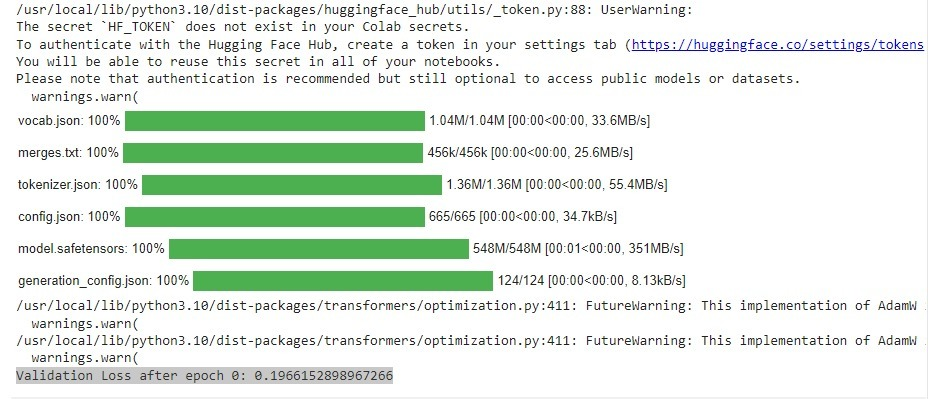



This conducted step to Fine-Tune the mode will serve as the template for training, which wasn't concluded in the initial stage due to challenges with limited disk space and RAM. To address this, we opted to acquire a Google Colab subscription for enhanced computing power. The training is currently in progress and is expected to take an extended duration. Once we obtain the answers, our intention is to upload the model with the hope that it will be completed within the allocated time frame.

#### Testing GPT2-Model

In [ ]:
def generate_answer(question, model, tokenizer, max_length=512):
    # Encode the question for the model
    encoded_question = tokenizer.encode("Question: " + question + " Answer:", add_special_tokens=True, return_tensors="pt")
    encoded_question = encoded_question.to(device)  # Send to device (CPU/GPU)

    # Generate the answer
    output_sequences = model.generate(input_ids=encoded_question, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2)
    
    # Decode the generated answer
    generated_answer = tokenizer.decode(output_sequences[0], skip_special_tokens=True)
    
    return generated_answer

# Example usage
new_question = "What are the latest trends in solar energy?"
generated_answer = generate_answer(new_question, model, tokenizer)
print(generated_answer)

The code above is designed for testing our GPT-2 model. However, since the model's training phase hasn't produced any results yet, we are unable to assess its performance. 

In [2]:
# list / displaying packages containing torch
pip list | grep torch


torch                     2.1.2
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Update pip
pip install --upgrade pip


  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/15/aa/3f4c7bcee2057a76562a5b33ecbd199be08cdb4443a02e26bd2c3cf6fc39/pip-23.3.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


## Evaluate Model Performance

To evaluate the performance of your GPT-2 model, we used metrics such as perplexity, BLEU score, and conducted a qualitative analysis by inspecting generated answers. Below is an example using perplexity as a metric:

In [ ]:
import pandas as pd
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Assuming you have already defined the GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Load your QA pairs from the CSV file
qa_df = pd.read_csv('qa_pairs.csv')

# Evaluate the model on the QA pairs
total_loss = 0.0
num_samples = len(qa_df)

# Set the model in evaluation mode
model.eval()

with torch.no_grad():
    for _, row in qa_df.iterrows():
        question = row['Question']
        answer = row['Answer']

        # Concatenate the question and answer for input
        input_text = f"Question: {question} Answer: {answer}"
        
        # Encode the input text
        input_ids = tokenizer.encode(input_text, return_tensors='pt')

        # Generate the output
        outputs = model(input_ids)
        logits = outputs.logits

        # Compute the loss (perplexity) - assuming you have a target (gold standard) answer
        target_ids = tokenizer.encode(answer, return_tensors='pt')
        loss = torch.nn.functional.cross_entropy(logits.view(-1, logits.size(-1)), target_ids.view(-1))

        total_loss += loss.item()

# Calculate average perplexity
average_perplexity = torch.exp(total_loss / num_samples)
print(f"Average Perplexity: {average_perplexity.item()}")


## Final Note: 

Hello Guang and Diego,

We would like to express our sincere gratitude for the invaluable insights and guidance provided throughout this course, particularly in the areas of Data Preparation for Embeddings, Word Embedding Training, Embedding Model Evaluation, and the culminating assignment on Transfer Learning with Open Source Models.

The exploration of Transfer Learning with Open Source Models, specifically the option to implement fine-tuning on pre-trained models from BERT to GPT-2, has been a truly enriching experience. Sadly we did not have the appropriate means to conduct the final computations of the desired language model. Nevertheless, The assignment allowed us to delve into the fascinating realm of transfer learning, comparing the performance of these pre-trained models with our in-house embeddings. The cleantech main topic was a good enriching example to delve our NLP experience with.

## Fazit:



In our pursuit of training a GPT model, we encountered challenges that led us to evaluate several key aspects of the process. Initially, we closely monitored memory usage, scrutinizing both GPU and disk space utilization. Adjustments were made to the batch size, and we experimented with gradient accumulation to alleviate memory constraints. Additionally, we considered the model size, contemplating the trade-off between computational requirements and performance. Despite these efforts, our primary strategy was to adhere to the principle of making changes incrementally and testing after each adjustment. This iterative approach allowed us to identify the specific factors contributing to the training crashes. However, if issues persist, we acknowledge the possibility of hardware-related limitations. In such cases, obtaining access to a machine with more resources may be a viable solution to ensure the successful completion of the training process.


## Our Key Highlights:


In our endeavor to merge NLP prowess with cleantech innovation, our project, "Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction," takes center stage. Focused on empowering the next generation of NLP enthusiasts and cleantech innovators, our goal is to expedite text analysis, knowledge acquisition, and innovation within the cleantech sector using NLP techniques.

In this unique venture, we recognized the significance of analyzing specialized media publications on cleantech topics. These publications served as a goldmine of knowledge, unveiling emerging trends, key players, and cutting-edge technologies in cleantech. This strategic analysis not only informed us about the state of the art but also revealed to us critical technological collaborations and scientific opportunities. By harnessing the power of NLP, we aim to extract valuable insights from vast textual data, contributing to groundbreaking research for a more sustainable future.

Through this project, we: Rebecca, Sasa, and Tejesh, have not only delved into the intricacies of NLP but also gained expertise in cleantech, creating a meaningful impact on environmental sustainability. Our multifaceted approach to NLP-powered text mining and knowledge extraction uncovered for us hidden a new path to handle data & information through computational language processing!
